In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#MNIST dataset is made up of images of handwritten digits, 28x28 pixels in size and 10000 datasets.
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()


In [3]:
x_test.shape


(10000, 28, 28)

In [4]:
y_test.shape


(10000,)

In [5]:
x_train.shape


(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

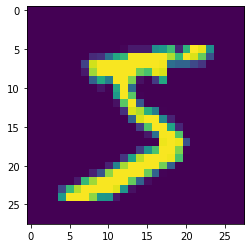

In [7]:
plt.imshow(x_train[0])

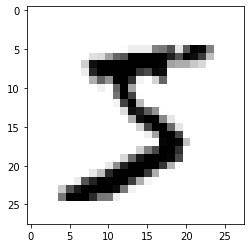

In [8]:
# if the image is color change it into binary image
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])# before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
# normalize the data
x_train=tf.keras.utils.normalize(x_train,axis=1)

In [11]:
x_test=tf.keras.utils.normalize(x_test,axis=1)

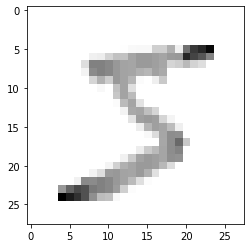

In [12]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [13]:
#after normalization( data b/w 0 & 1)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
print(y_train[0])# labels inside our network (values in x axis)

5


In [15]:
#resizing image 
img_size=28

x_train=np.array(x_train).reshape(-1,img_size,img_size,1)
x_test=np.array(x_test).reshape(-1,img_size,img_size,1)


In [16]:
print("Training sample dimensions",x_train.shape)
print("Testing sample dimensions",x_test.shape)


Training sample dimensions (60000, 28, 28, 1)
Testing sample dimensions (10000, 28, 28, 1)


In [17]:
# Train 60000 samples of MNIST handwritten datasets
from tensorflow.keras.models import Sequential


In [18]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [19]:
model= Sequential()
model.add(Conv2D(64,(3,3),input_shape =x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
          
model.add(Dense(10))
model.add(Activation("softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [21]:
print("Total training samples= ", len(x_train))

Total training samples=  60000


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=5,validation_split=0.3, batch_size = 1 )


Epoch 1/5
42000/42000 [==============================] - 140s 3ms/step - loss: 0.2220 - accuracy: 0.9344 - val_loss: 0.0971 - val_accuracy: 0.9726
Epoch 2/5
42000/42000 [==============================] - 148s 4ms/step - loss: 0.1149 - accuracy: 0.9695 - val_loss: 0.1200 - val_accuracy: 0.9689
Epoch 3/5
42000/42000 [==============================] - 136s 3ms/step - loss: 0.1019 - accuracy: 0.9749 - val_loss: 0.3742 - val_accuracy: 0.9596
Epoch 4/5
42000/42000 [==============================] - 134s 3ms/step - loss: 0.0970 - accuracy: 0.9762 - val_loss: 0.1035 - val_accuracy: 0.9764
Epoch 5/5
42000/42000 [==============================] - 137s 3ms/step - loss: 0.0935 - accuracy: 0.9771 - val_loss: 0.1021 - val_accuracy: 0.9789


In [24]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test loss on 10000 test samples",test_loss)
print("valisation accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.1097 - accuracy: 0.9797
Test loss on 10000 test samples 0.10967689007520676
valisation accuracy on 10000 test samples 0.9797000288963318


In [25]:
predictions=model.predict(x_test)

In [26]:
print(predictions)

[[3.35557675e-32 2.62298093e-19 5.48516782e-18 ... 1.00000000e+00
  5.57302335e-22 9.19684891e-22]
 [5.03405445e-16 1.28108791e-18 1.00000000e+00 ... 1.44717225e-08
  2.21683652e-12 1.53321824e-21]
 [2.25767287e-38 1.00000000e+00 0.00000000e+00 ... 1.03865752e-31
  2.59466233e-31 9.36275020e-32]
 ...
 [3.39521678e-20 1.14189905e-18 1.35496386e-17 ... 7.45194639e-17
  2.06838210e-11 2.08018894e-10]
 [5.53814163e-14 5.14329946e-16 3.27609481e-17 ... 8.64990037e-21
  2.61743835e-08 1.05120135e-09]
 [9.39960665e-10 6.55608380e-12 3.09433094e-19 ... 1.84580825e-33
  7.18739401e-10 1.64789596e-13]]


In [27]:
print(np.argmax(predictions[0]))

7


lable ->  7
prediction ->  7


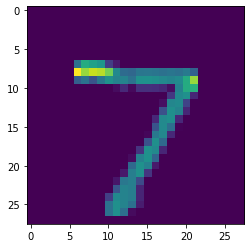

In [28]:
  
print('lable -> ',y_test[0])
print('prediction -> ',np.argmax(predictions[0]))
plt.imshow(x_test[0])

In [29]:
import cv2

In [30]:
img=cv2.imread('C:/Users/chand/OneDrive/Documents/eight.png')

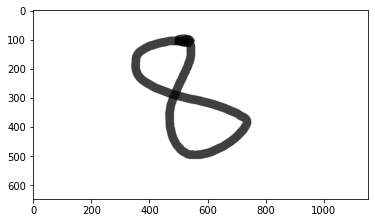

In [31]:
plt.imshow(img)

In [32]:
img.shape

(648, 1152, 3)

In [33]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [34]:
gray.shape

(648, 1152)

In [35]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [36]:
resized.shape

(28, 28)

In [37]:
new=tf.keras.utils.normalize(resized,axis=1)

In [38]:
new=np.array(new).reshape(-1,28,28,1)

In [39]:
new.shape

(1, 28, 28, 1)

In [40]:
predictions= model.predict(new)

In [44]:
print(np.argmax(predictions))

0


In [45]:
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
video = cv2.VideoCapture("C:/Users/chand/OneDrive/Documents/Bandicam/digit.mp4")
if not video.isOpened():
    video=cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("can't open webcam")

font=cv2.FONT_HERSHEY_PLAIN
font_scale=1.5
text ="some text"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
(text_offset_x)=10
text_offset_y=img.shape[0] - 25
box_coords=((text_offset_x,text_offset_y),(text_offset_x + text_width + 2 ,text_offset_y - text_height - 2))
cntr=0
while True:
    ret,frame=video.read()
    cntr=cntr+1;
    if((cntr%2)==0):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
        new=tf.keras.utils.normalize(resized,axis=1)
        new=np.array(new).reshape(-1,28,28,1)
            
        predictions=model.predict(new)
        status=np.argmax(predictions)
        print(status)
        print(type(status))
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            
        cv2.imshow('Handwritten Digit Recognition',frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
video.release()
cv2.destroyAllWindows()

1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
5
<class 'numpy.int64'>
1
<class 'numpy.int64'>
5
<class 'numpy.int64'>
5
<class 'numpy.int64'>
5
<class 'numpy.int64'>
5
<class 'numpy.int64'>
5
<class 'numpy.int64'>
5
<class 'numpy.int64'>
1
<class 'numpy.

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
